# **Capstone project: Providing data-driven suggestions for HR**

## Planning Stage



💭
### Reflect on these questions as you complete the plan stage.

- Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- Do you have any ethical considerations in this stage?




1. The stakeholders interested in this project would be upper management primarily, as they are reciving pressures from leadership and shareholders to find ways to combat attrition as the cost of replacing an employee are high relative to employee retention.
2. Some of the inital observations I make by looking at the make up of the data is that it contains some of the key factors to consider when determening what makes an employee leave a company, I expect to find some linear relationships when it comes to some of these columns relating to the left column.
3. Some resources I plan on using for the plan stage would just be some of the exploratory dataset functions, such as head(), dtypes(), and duplicates(). My goal would be to geta glimpse at the dataset so I can derive a plan of execution.
4. Some of the ethical considerations that there would be to condier at a first glance of the business problem is to make sure that there is no PII to identify the name of the employee being represented to avoid any privacy violations. 

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import sklearn.metrics as metrics
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset into a dataframe

df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe

df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)




In [3]:
# Gather basic information about the data

df0.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data

df0['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

### Rename columns

In [5]:
# Display all column names, fix column spelling errors

df0.rename(columns={'number_project':'project_count','average_montly_hours':'average_monthly_hours',
                    'Work_accident':'work_accident','time_spend_company':'tenure'},inplace=True)
                
df0

,satisfaction_level,last_evaluation,project_count,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### Check missing values

In [6]:
# Check for missing values

df0.isna().sum(axis=0)

satisfaction_level       0
last_evaluation          0
project_count            0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [7]:
# Check for duplicates

df0.duplicated().sum()

3008

In [9]:
# Drop duplicates and save resulting dataframe in a new variable as needed

df1=df0.drop_duplicates()

# Display first few rows of new dataframe as needed

df1.duplicated().any()

False

### Check outliers

Check for outliers in the data.

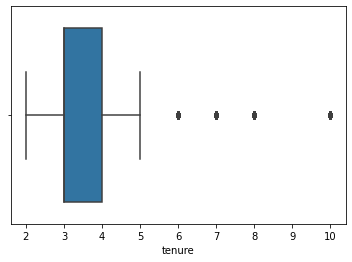

In [10]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

sns.boxplot(data=df1, x='tenure')


In [11]:
# Determine the number of rows containing outliers and removing outliers from the dataset

df1['z-score']=stats.zscore(df1['tenure'])
df2=df1[~((df1['z-score']>3) | (df1['z-score']<-3))]
df2['z-score']<-3

0        False
1        False
2        False
3        False
4        False
         ...  
11989    False
11990    False
11991    False
11992    False
11999    False
Name: z-score, Length: 11803, dtype: bool

In [12]:
#Convert categorical data into numeric data for modeling

df2['salary'] = df2['salary'].replace({"low" : 1, "medium" : 2, "high" : 3})
df2['Department'] = df2['Department'].replace({'sales': 1 , 'accounting': 2, 'hr': 3, 'technical': 4, 'support': 5, 'management': 6,
       'IT': 7, 'product_mng': 8, 'marketing': 9, 'RandD': 10})
df2

,satisfaction_level,last_evaluation,project_count,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,Department,salary,z-score
0,0.38,0.53,2,157,3,0,1,0,1,1,-0.274291
1,0.80,0.86,5,262,6,0,1,0,1,2,1.981036
2,0.11,0.88,7,272,4,0,1,0,1,2,0.477485
3,0.72,0.87,5,223,5,0,1,0,1,1,1.229261
4,0.37,0.52,2,159,3,0,1,0,1,1,-0.274291
...,...,...,...,...,...,...,...,...,...,...,...
11989,0.90,0.76,3,255,7,0,0,0,8,1,2.732812
11990,0.49,0.49,4,212,7,0,0,0,8,2,2.732812
11991,0.60,0.53,2,235,7,0,0,0,7,2,2.732812
11992,0.62,0.85,3,237,3,1,0,0,7,2,-0.274291


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

In [13]:
#display distribution of employees that stayed vs left

df2['left'].value_counts()
print('Stayed = ' + str(9812/(9812+1991)) + '  Left = ' + str(1991/(9812+1991)))

Stayed = 0.8313140726933831  Left = 0.16868592730661697


## Step 2. Data Exploration (Continue EDA)



In [15]:
# Get numbers of people who left vs. stayed

stayed=(df2['left'] == 0).value_counts()
left=(df2['left'] == 1).value_counts()

# Get percentages of people who left vs. stayed

print('Stayed = ' + str(stayed) + '  Left = ' + str(left))

Stayed = True     9812
False    1991
Name: left, dtype: int64  Left = False    9812
True     1991
Name: left, dtype: int64


### Data visualizations

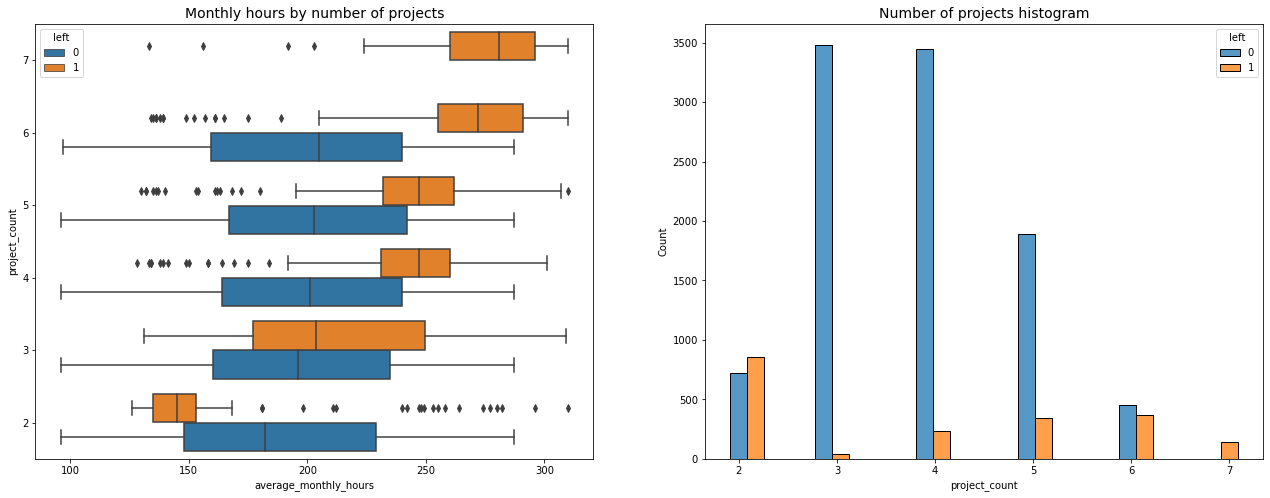

In [16]:
# Create a plot as needed


fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='project_count', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['project_count']
tenure_left = df1[df1['left']==1]['project_count']
sns.histplot(data=df1, x='project_count', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

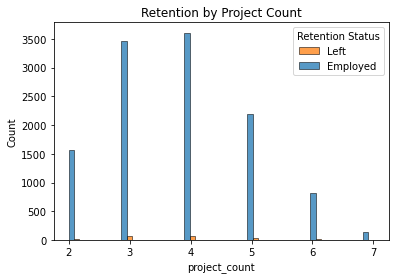

In [17]:
# View relationship between Retention Status and Project count - is overworking causing attrition?

sns.histplot(data=df1, x='project_count', hue='promotion_last_5years', multiple='dodge').set_title('Retention by Project Count')
plt.legend(title="Retention Status", labels=["Left", "Employed"])
plt.show()

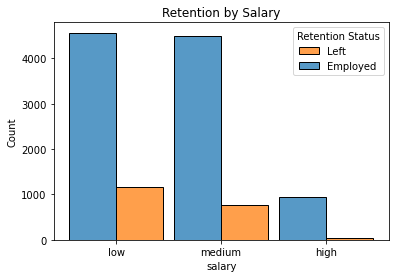

In [19]:
# View relationship between Retention Status and salary - is compensation causing attrition?

sns.histplot(data=df1, x='salary', hue='left', multiple='dodge', shrink =0.9).set_title('Retention by Salary')
plt.legend(title="Retention Status", labels=["Left", "Employed"])
plt.show()

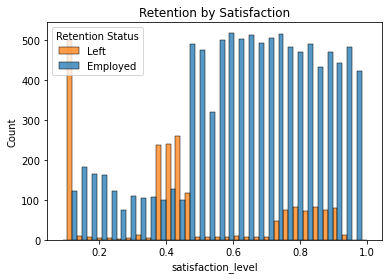

In [20]:
# View relationship between Retention Status and satisfaction - is low satisfaction causing attrition?

sns.histplot(data=df1, x='satisfaction_level', hue='left',multiple='dodge',shrink=1).set_title('Retention by Satisfaction')
plt.legend(title="Retention Status", labels=["Left", "Employed"])
plt.show()

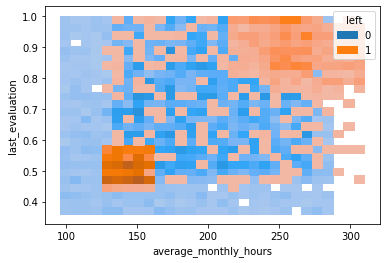

In [21]:
# View relationship between Retention Status and hours/satisfaction - is there a relationship with hours/satisfaction that is causing attrition?

sns.histplot(data=df1, x='average_monthly_hours',y='last_evaluation', hue='left')

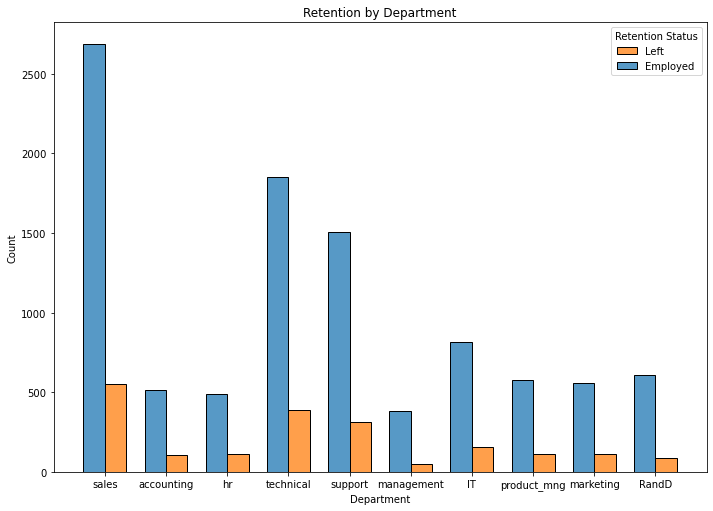

In [22]:
# View relationship between Retention Status and Department - is any specific Department causing most of the attrition?

fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.histplot(data=df1, x='Department', hue='left',multiple='dodge',shrink=.7,ax=ax).set_title('Retention by Department')
plt.legend(title="Retention Status", labels=["Left", "Employed"])
plt.show()

💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. After plotting and analyzing the relationships between Employee Leave Status and some of the other columns, it is evident that the biggest 2 factors that stand out is satisfaction level and salary (as expected). Another thing that stood out for me was that surprisingly employees that are put on less projects tend to leave more than employees who have more projects. I thought this would be reversed as being overworked tends to make employees leave.
2. Overall most of the distributions tend to be relatively normal, with right skewed distibutions in the salary,project number, and satisfaction relationships with employee retention status.
3. One big transformation to note would be the removal of outliers. As this decision was conflicting, as it would be beneficial to know why employees that just started or employees that have been at the company for the longest have left, their reasons might skew the rest of the population and it would be more beneficial to figure out the main reason of Attrition for the majority of the employees. I think it would be more beneficial to run a model to anaylze the early tenure employees and a model for the employees with the longest tenure's seperate, as their reasoning might skew the rest of the employees. This would be a decsion I would ask my co-workers/lead for more opinion.

### Insights

## Step 3. Model Building, Step 4. Results and Evaluation


### Identify the type of prediction task.

The prediction task that would help solve this situation would be to find out the main that cause an employee to leave the company

### Identify the types of models most appropriate for this task.

The model I find most appropriate for this task would be a Decision Based Tree model. This will help me find the most important factors that are statistically significant to explain the reason for an employees departure and can help HR for their analysis as well as even tailor a better employee satisfaction survey that can replicate the flow of the decision tree to determine if an employee is about to leave.

### Modeling



In [23]:
# Create datasets for X and Y variables

y=df2['left']

X=df2.copy()
X=X.drop(['left','z-score'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25, random_state=0)

In [24]:
# fit a Decision Tree model

decision_tree=DecisionTreeClassifier(random_state=0)

decision_tree.fit(X_train, y_train)

dt_pred = decision_tree.predict(X_test)

In [25]:
# Print testing metrics to evaluate model

print("decision tree results:")
print("Accuracy Score: ", "%.2f" % metrics.accuracy_score(y_test, dt_pred))
print("Precision Score: ", "%.2f" % metrics.precision_score(y_test, dt_pred))
print("Recall Score: ", "%.2f" % metrics.recall_score(y_test, dt_pred))
print("F1 Score:: ", "%.2f" % metrics.f1_score(y_test, dt_pred))

decision tree results:
Accuracy Score:  0.97
Precision Score:  0.90
Recall Score:  0.94
F1 Score::  0.92


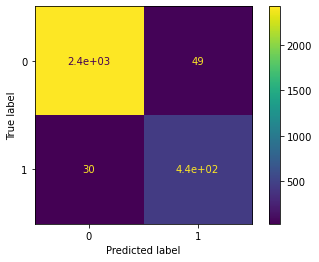

In [26]:
# Show confusion matrix to predict models ability to correctly guess true positives/negatives

cm= metrics.confusion_matrix(y_test, dt_pred, labels = decision_tree.classes_)
disp= metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = decision_tree.classes_)
disp.plot()

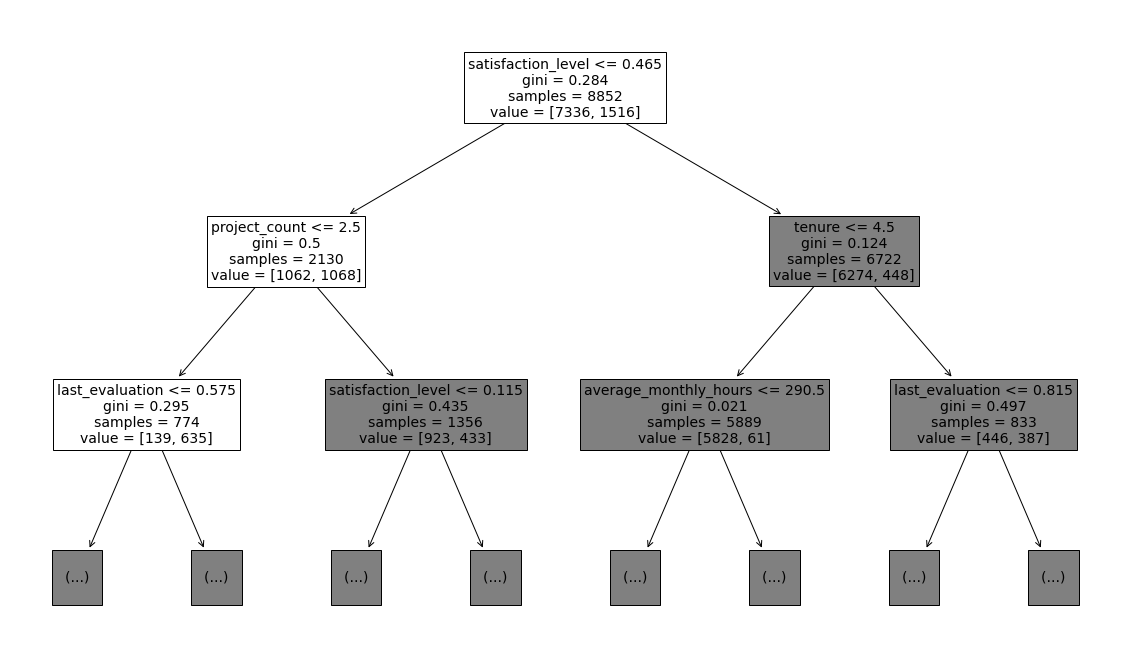

In [27]:
#Plot Decision Tree

plt.figure(figsize=(20,12))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=X.columns);

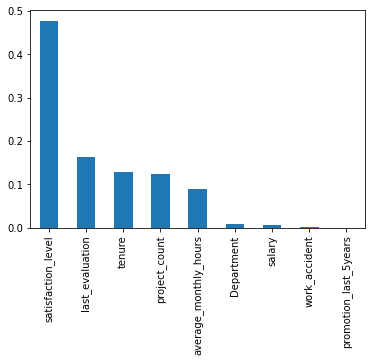

In [28]:
# Create Visual to show the most important factors that cause Attrition

importances = decision_tree.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

In [31]:
# Defining hyperparameters to predict the optimal Decision Tree model 

tree_para = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [32]:
#Testing each hyperparameter and comparing the outputs using F1 score

tuned_decision_tree = DecisionTreeClassifier(random_state=0)

clf = GridSearchCV(tuned_decision_tree, 
                   tree_para, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")

clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15

In [33]:
#Display optimal parameters

clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [34]:
# Display Validation Score

print("Best Avg. Validation Score: ", "%.4f" % clf.best_score_)

Best Avg. Validation Score:  0.9457


In [35]:
#Display measures of optimal Decison model in a table to compare to original model predicted

results = pd.DataFrame(columns=['Model', 'F1', 'Recall', 'Precision', 'Accuracy'])

def make_results(model_name, model_object):
    """
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    """

    # Get all the results from the CV and put them in a df.
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score).
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row.
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

 
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )

    return table

result_table = make_results("Tuned Decision Tree", clf)

result_table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.945715,0.914917,0.978826,0.982038


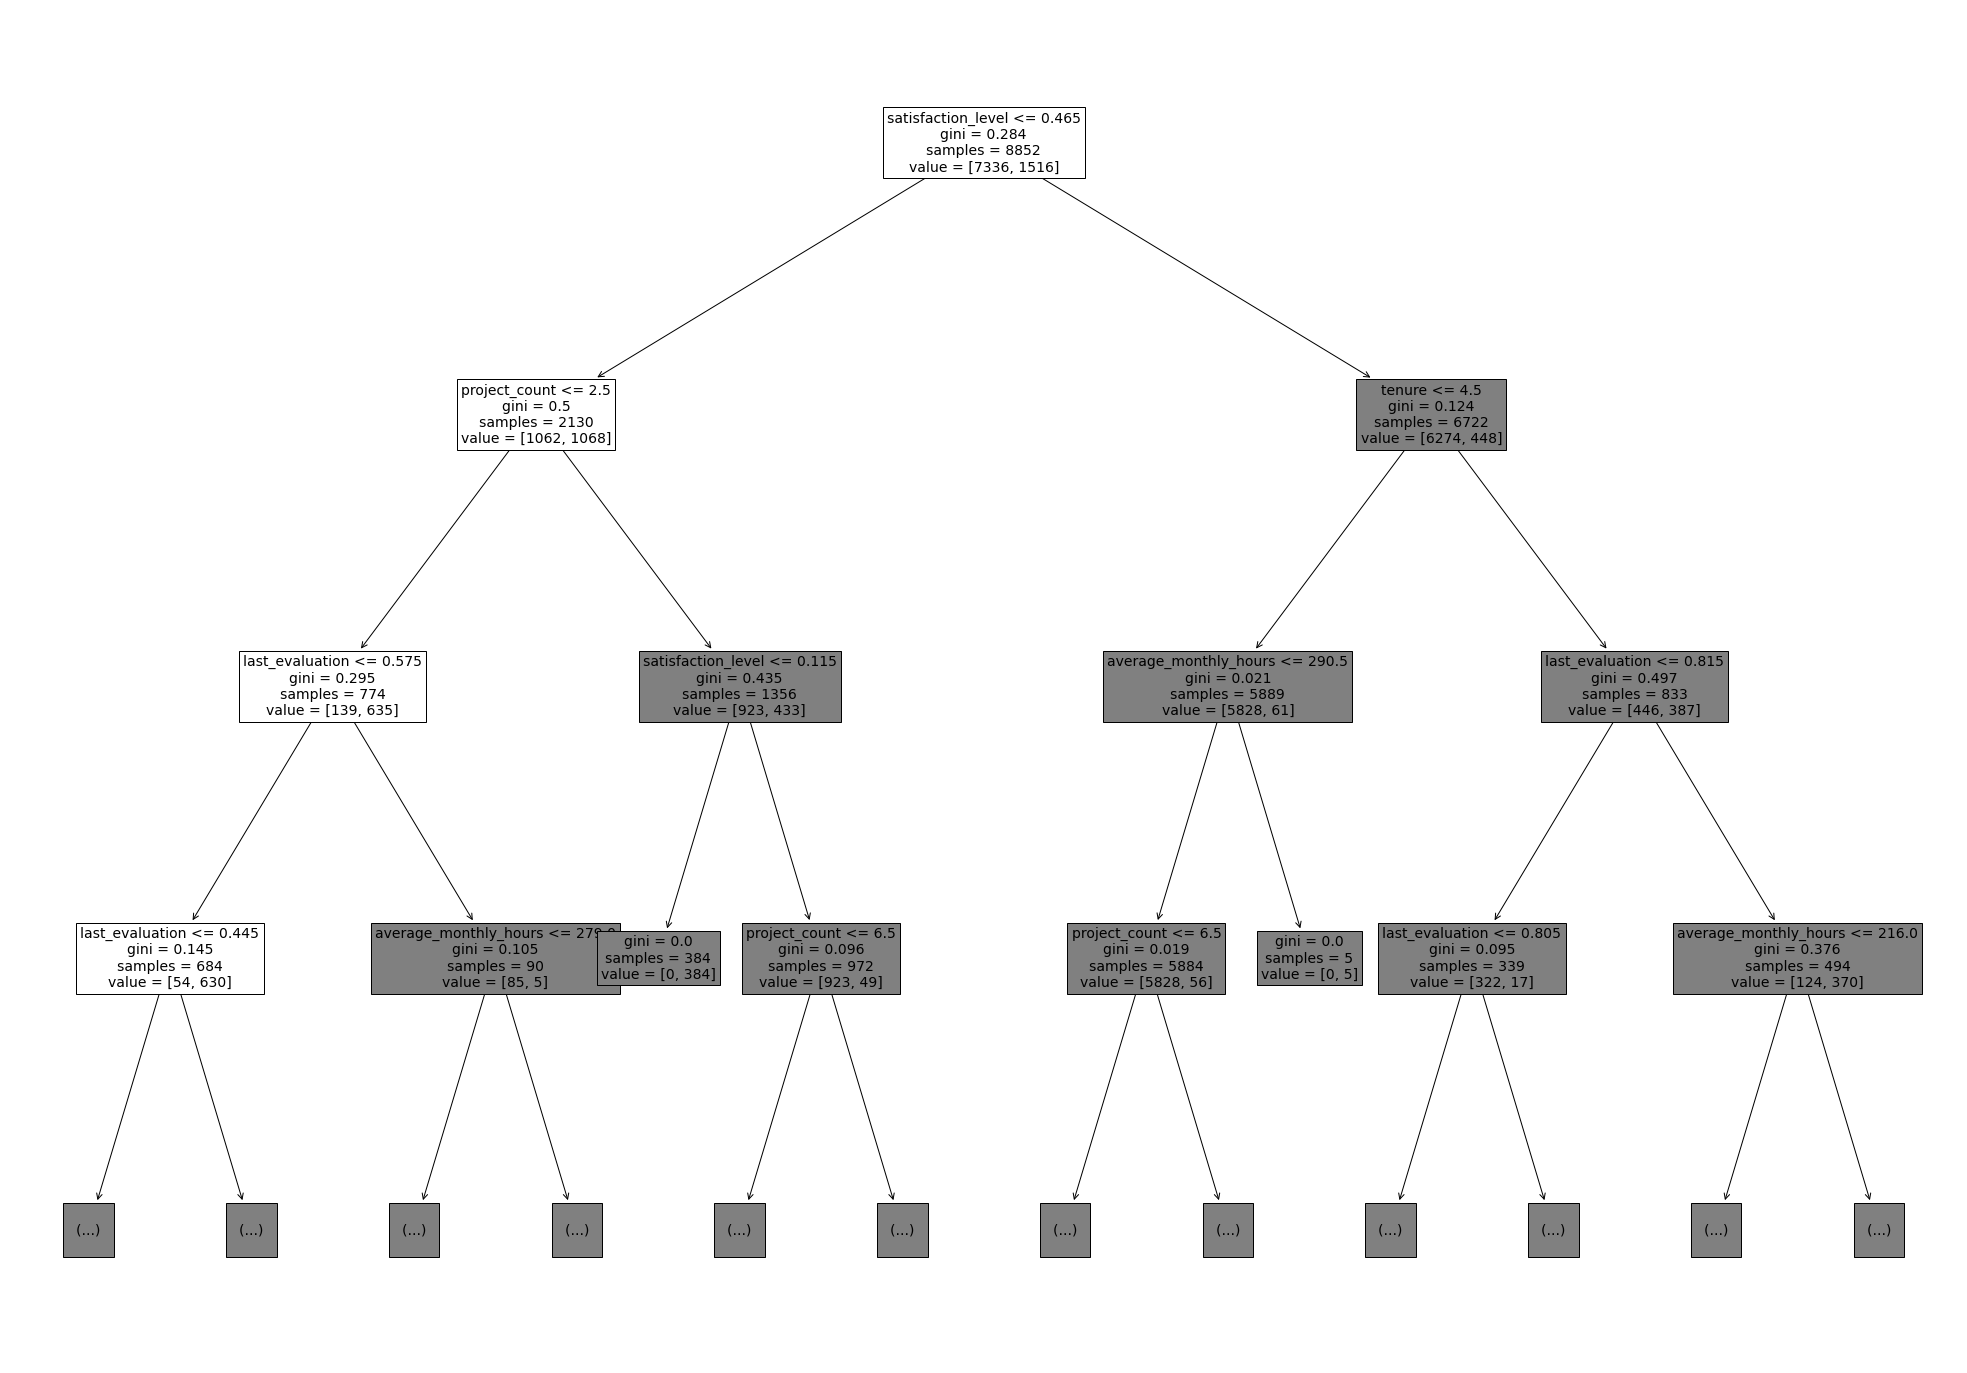

In [36]:
#Display optimal model

plt.figure(figsize=(35,25))
plot_tree(decision_tree, max_depth=3, fontsize=14, feature_names=X.columns);

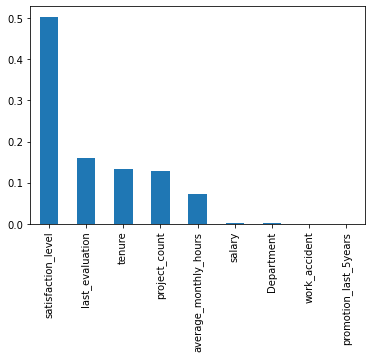

In [37]:
#Display graph showing feature importance relative to attrition

importances = clf.best_estimator_.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. Some of the key insights that emerged from my model is that the main factors that lead to employye attrition to look at is satisfaction level, last evaluation score, project count, and average monthly hours. We can also see a statistical flow of these factors that can estimate if an employee will leave or not. Looking at the Confusion Matrix, it also predicted a high amount of true positives and true negatives while only a small amount of false positives and negatives. This supports the models evaluation metrics with an accuracy of 98% , Precision of 97% (7% increase after fine tuning the model), and a recall score of 91%. This shows good evidence that the model is successful in predicting whether or not an employye will leave based on the factors provided. 
2. A business recommendation that I would propose would be for HR to tailor their satisfaction surveys to take a deeper dive into the factors explained above to maybe get a sense of how or why these factors cause an employee to leave. With the decsision tree model you can start the survey at the root, further going down to the nodes to help determine if the employee is on the cusp of leaving and maybe having that employee's supervisor check up on them to help tailor to their issues with the cmpany to prevent them from leaving.
3. The model can always be improved with more hyperparameters but another thing could be to create more insights from the survey to gather more columns that could potentially provide more insights to features we haven't thought about or considered in the model yet.